In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np 
from sklearn.model_selection import train_test_split

In [22]:
pitches = pd.read_csv("pitchesFinalDF.csv")

/Users/JeffyLands/182/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
input_cols = ['PAOFINNING', 'PITCHOFPA', 'Pitcher Id Norm', 'PITCHERTHROWS', 'BATTERSIDE', 'INNING', 'OUTS', 
             'BALLS', 'STRIKES', 'PitchOutcome', 'RELSPEED', 'VERTRELANGLE', 'HORZRELANGLE', 'SPINRATE',
             'SPINAXIS', 'RELHEIGHT', 'RELSIDE', 'EXTENSION', 'VERTBREAK', 'INDUCEDVERTBREAK', 'HORZBREAK',
             'PLATELOCHEIGHT', 'PLATELOCSIDE', 'VERTAPPRANGLE', 'HORZAPPRANGLE', 'PFXX', 'PFXZ', 'X0', 'Z0',
             'VX0', 'VY0', 'VZ0', 'AX0', 'AY0', 'AZ0', 'Batter Id Norm', 'NEXT BALLS', 'NEXT STRIKES', 'NEXT OUTS',
             'NEXT INNING', 'PA NEXT', 'NEXT PITCHERID', 'Pitch Type', 'Next Pitch Label']

In [24]:
pitches['values'] = pitches[input_cols[:len(input_cols) - 1]].apply(lambda x: list(x), axis=1)

In [25]:
pitches = pitches[pitches['Next Pitch Label'].notnull()]

In [26]:
pitches['label'] = pitches['Next Pitch Label'] + 1

In [27]:
pitches.groupby(["PI_PITCH_TYPE", "Pitch Type"]).count()

,,Unnamed: 0,PITCHNO,TM_DATE_TIME,PAOFINNING,PITCHOFPA,PITCHER,PITCHERID,PITCHERTHROWS,BATTER,BATTERID,...,NEXT STRIKES,NEXT BATTER,NEXT BATTERID,NEXT OUTS,NEXT INNING,PA NEXT,NEXT PITCHERID,Next Pitch Label,values,label
PI_PITCH_TYPE,Pitch Type,,,,,,,,,,,,,,,,,,,,,
CH,0,75489,75489,75488,75489,75489,75489,75489,75489,75489,75489,...,75489,75489,75489,75489,75489,75489,75489,75489,75489,75489
CS,1,198,198,198,198,198,198,198,198,198,198,...,198,198,198,198,198,198,198,198,198,198
CU,2,73634,73634,73633,73634,73634,73634,73634,73634,73634,73634,...,73634,73634,73634,73634,73634,73634,73634,73634,73634,73634
FA,3,272668,272668,272662,272668,272668,272668,272668,272668,272668,272668,...,272668,272668,272668,272668,272668,272668,272668,272668,272668,272668
FC,4,41434,41434,41434,41434,41434,41434,41434,41434,41434,41434,...,41434,41434,41434,41434,41434,41434,41434,41434,41434,41434
FS,5,9722,9722,9722,9722,9722,9722,9722,9722,9722,9722,...,9722,9722,9722,9722,9722,9722,9722,9722,9722,9722
IB,6,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
KN,7,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
PO,8,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54


In [42]:
data_ready = pitches.groupby(['GAMEID', 'TOP_BOTTOM']).agg({'values': lambda x: list(x), 'label': lambda x: list(x)})
data_ready.head()

values  \
GAMEID TOP_BOTTOM                                                      
529466 Bottom      [[1.0, 1.0, 505.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0....   
       Top         [[1.0, 1.0, 525.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0....   
529615 Bottom      [[1.0, 1.0, 414.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0....   
       Top         [[1.0, 1.0, 61.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0...   
529630 Bottom      [[1.0, 1.0, 258.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0....   

                                                               label  
GAMEID TOP_BOTTOM                                                     
529466 Bottom      [4.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, ...  
       Top         [4.0, 4.0, 4.0, 3.0, 11.0, 11.0, 11.0, 1.0, 11...  
529615 Bottom      [4.0, 4.0, 3.0, 1.0, 4.0, 1.0, 4.0, 1.0, 3.0, ...  
       Top         [1.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 11.0,...  
529630 Bottom      [11.0, 11.0, 3.0, 11.0, 1.0, 11.0, 4.0, 11.0, ...

In [43]:
train, test = train_test_split(data_ready, test_size=0.2)

In [44]:
train_values = train['values'].values
train_labels = train['label'].values
test_values = test['values'].values
test_labels = test['label'].values

In [45]:
max_length = 300

In [46]:
# add code to prevent games with > 200 pitches from being considered 
def generate_batch(batch_size, values, labels):
    
    total = len(values)
    
    indices = np.random.choice(total, batch_size, replace=False)
    
    batch_values = np.take(values, indices)
    
    batch_labels = np.take(labels, indices)
    
    to_be_masked = [0 for _ in range(input_size)]
    
    masked = []
    
    values = []
    for val in batch_values:
        m = [1 for _ in range(len(val))]
        while len(val) < max_length:
            val.append(to_be_masked)
            m.append(0)
        values.append(val)
        masked.append(m)
    
    
    labels = []
    for val in batch_labels:
        while len(val) < max_length:
            val.append(0)
        labels.append(val)
    
    return values, labels, masked

In [47]:
v, l, masked = generate_batch(20, train_values, train_labels)

In [48]:
input_size = len(input_cols) - 1
output_size = 14

In [49]:
class LSTMModel():
    
    def __init__(self, rnn_size, output_size, learning_rate=1e-4):

        self.inputs = tf.placeholder(tf.float32, shape=[None, max_length, input_size]) # batch size, num_pitches, num_inputs
        self.labels = tf.placeholder(tf.int32, shape=[None, max_length])
        self.labels_mask = tf.placeholder(tf.bool, shape=[None, max_length])
    
        lm_cell = tf.nn.rnn_cell.LSTMCell(rnn_size)
    
        outputs, states = tf.nn.dynamic_rnn(lm_cell, self.inputs, dtype=tf.float32)
    
        self.output_logits = tf.layers.dense(outputs, output_size)
    
        self.loss = tf.losses.sparse_softmax_cross_entropy(self.labels, self.output_logits, weights=tf.cast(self.labels_mask, tf.float32))
        
        optimizer = tf.train.AdamOptimizer(learning_rate)
        
        self.global_step = tf.train.get_or_create_global_step()
        self.train_op = optimizer.minimize(self.loss)
        self.saver = tf.train.Saver()

In [50]:
tf.reset_default_graph()
model = LSTMModel(256, output_size, 1e-3)

In [51]:
inputs, labels, masked = generate_batch(20, train_values, train_labels)
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    d = {model.inputs: inputs, model.labels: labels, model.labels_mask: masked}
    
    for i in range(10):
    
        loss, _ = sess.run([model.loss, model.train_op], feed_dict = d)
    
        print(loss)

2.8808098
2.5977788
2.3635824
2.1954527
2.0701804
1.9767958
1.9132782
1.8645805
1.8248469
1.7877395


# Tuning for the learning rate

In [54]:
tf.reset_default_graph()
rnn_size = 256
learning_rates = np.arange(1e-5, 1e-2, 1e-4)
learning_rate_mean_error = []
learning_rate_min_error = []
    
for learning_rate in learning_rates:
    
    tf.reset_default_graph()
    
    with tf.Session() as sess:
    
        rnn_size = 256
        learning_rates = np.arange(1e-5, 1e-2, 1e-4)
    
        model = LSTMModel(rnn_size, output_size, learning_rate)
        sess.run(tf.global_variables_initializer())
        
        batch_size = 20
        loss = []
    
        for i in range(10):
        
            inputs, labels, masked = generate_batch(20, train_values, train_labels)
        
            for j in range(5):
    
                d = {model.inputs: inputs, model.labels: labels, model.labels_mask: masked}
        
                train_loss, _ = sess.run([model.loss, model.train_op], feed_dict=d)
        
            loss.append(train_loss)
    
        learning_rate_mean_error.append(np.mean(loss))
        learning_rate_min_error.append(min(loss))
        
        

learning rate: 1e-05 loss: 2.6215873
learning rate: 0.00011 loss: 1.728412
learning rate: 0.00021 loss: 1.4036508
learning rate: 0.00031000000000000005 loss: 1.3202653
learning rate: 0.00041000000000000005 loss: 1.2393204
learning rate: 0.00051 loss: 1.3650403
learning rate: 0.0006100000000000001 loss: 1.1215304
learning rate: 0.00071 loss: 1.441461
learning rate: 0.0008100000000000001 loss: 1.1344992
learning rate: 0.0009100000000000001 loss: 1.1701564
learning rate: 0.00101 loss: 1.1721164
learning rate: 0.00111 loss: 1.1267387
learning rate: 0.0012100000000000001 loss: 1.0482844
learning rate: 0.0013100000000000002 loss: 0.9873576
learning rate: 0.00141 loss: 1.0191339
learning rate: 0.00151 loss: 0.88933337
learning rate: 0.00161 loss: 0.92304796
learning rate: 0.0017100000000000001 loss: 0.9911553
learning rate: 0.0018100000000000002 loss: 1.0689993
learning rate: 0.00191 loss: 0.9605158
learning rate: 0.00201 loss: 1.0708144
learning rate: 0.0021100000000000003 loss: 0.945106
lea

In [57]:
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

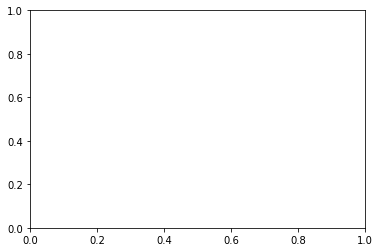

In [58]:
plt.plot(learning_rates, learning_rate_mean_error)
plt.show()

# Tuning for the rnn size

In [56]:
tf.reset_default_graph()
rnn_sizes = np.arange(128, 512, 4)
learning_rate = 1e-3
rnn_size_mean_error = []
rnn_size_min_error = []
    
for rnn_size in rnn_sizes:
    
    tf.reset_default_graph()
    
    with tf.Session() as sess:
    
        model = LSTMModel(rnn_size, output_size, learning_rate)
        sess.run(tf.global_variables_initializer())
        
        batch_size = 20
        loss = []
    
        for i in range(10):
        
            inputs, labels, masked = generate_batch(20, train_values, train_labels)
        
            for j in range(5):
    
                d = {model.inputs: inputs, model.labels: labels, model.labels_mask: masked}
        
                train_loss, _ = sess.run([model.loss, model.train_op], feed_dict=d)
        
            loss.append(train_loss)
    
        rnn_size_mean_error.append(np.mean(loss))
        rnn_size_min_error.append(min(loss))

rnn size: 128 loss: 0.80534244
rnn size: 132 loss: 0.87178415
rnn size: 136 loss: 0.85912347
rnn size: 140 loss: 0.8280902
rnn size: 144 loss: 0.8286291
rnn size: 148 loss: 0.8314695
rnn size: 152 loss: 0.8042821
rnn size: 156 loss: 0.79929554
rnn size: 160 loss: 0.92810756
rnn size: 164 loss: 0.81688267
rnn size: 168 loss: 0.81666577
rnn size: 172 loss: 0.7570935
rnn size: 176 loss: 0.7773655
rnn size: 180 loss: 0.82488096
rnn size: 184 loss: 0.8180433
rnn size: 188 loss: 0.8135837
rnn size: 192 loss: 0.8829653
rnn size: 196 loss: 0.8193001
rnn size: 200 loss: 0.8410135
rnn size: 204 loss: 0.8377801
rnn size: 208 loss: 0.83733994
rnn size: 212 loss: 0.8280503
rnn size: 216 loss: 0.8301686
rnn size: 220 loss: 0.77616096
rnn size: 224 loss: 0.8155944
rnn size: 228 loss: 0.8182905
rnn size: 232 loss: 0.79533374
rnn size: 236 loss: 0.8359507
rnn size: 240 loss: 0.8559127
rnn size: 244 loss: 0.806314
rnn size: 248 loss: 0.76641226
rnn size: 252 loss: 0.7695721
rnn size: 256 loss: 0.8106596

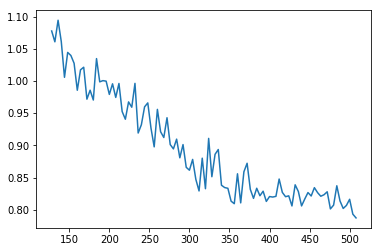

In [59]:
plt.plot(rnn_sizes, rnn_size_mean_error)
plt.show()

In [ ]:
len(rnn_sizes)

In [ ]:
model.saver.restore(sess, experiment)